In [62]:
#import libraries
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

#dùng để xoay góc ảnh
from PIL import Image
import pandas as pd
import os

In [63]:
# Đọc file CSV phân biệt tay
data = pd.read_csv('team/Label.csv')

In [64]:
#đọc dữ liệu file phân loại tay
data.head()

,STT,Folder,ID,Tay T (trai)/P (phai)/2 (ca 2 tay)
0,No. 1,train1,1377,T
1,No. 2,train1,1378,T
2,No. 3,train1,1379,T
3,No. 4,train1,1380,T
4,No. 5,train1,1381,T


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   STT                                 2500 non-null   object
 1   Folder                              2500 non-null   object
 2   ID                                  2500 non-null   int64 
 3   Tay T (trai)/P (phai)/2 (ca 2 tay)  2500 non-null   object
dtypes: int64(1), object(3)
memory usage: 78.3+ KB


In [66]:
filt = ((data['Tay T (trai)/P (phai)/2 (ca 2 tay)']=='P')) #filter DataFrame
data[filt]

,STT,Folder,ID,Tay T (trai)/P (phai)/2 (ca 2 tay)
8,No. 9,train1,1385,P
18,No. 19,train1,1398,P
24,No. 25,train1,1405,P
25,No. 26,train1,1406,P
32,No. 33,train1,1415,P
...,...,...,...,...
2291,No. 2292,train1,3926,P
2293,No. 2294,train1,3928,P
2400,No. 2401,train1,4047,P
2415,No. 2416,train1,4064,P


In [67]:
data[filt].count()

STT                                   93
Folder                                93
ID                                    93
Tay T (trai)/P (phai)/2 (ca 2 tay)    93
dtype: int64

In [68]:
filt2 = ((data['Tay T (trai)/P (phai)/2 (ca 2 tay)']=='T')) #filter DataFrame
data[filt2]

,STT,Folder,ID,Tay T (trai)/P (phai)/2 (ca 2 tay)
0,No. 1,train1,1377,T
1,No. 2,train1,1378,T
2,No. 3,train1,1379,T
3,No. 4,train1,1380,T
4,No. 5,train1,1381,T
...,...,...,...,...
2495,No. 2496,train1,4151,T
2496,No. 2497,train1,4152,T
2497,No. 2498,train1,4153,T
2498,No. 2499,train1,4154,T


In [69]:
data[filt2].count()

STT                                   2391
Folder                                2391
ID                                    2391
Tay T (trai)/P (phai)/2 (ca 2 tay)    2391
dtype: int64

In [70]:
filt3 = ((data['Tay T (trai)/P (phai)/2 (ca 2 tay)']=='2')) #filter DataFrame
data[filt3]

,STT,Folder,ID,Tay T (trai)/P (phai)/2 (ca 2 tay)
46,No. 47,train1,1430,2
787,No. 788,train1,2256,2


In [71]:
# Thư mục chứa ảnh gốc và thư mục chứa ảnh sau khi xoay
image_folder = 'train1-dataset-image'
output_folder = 'train2'

In [72]:
# Chuẩn bị danh sách ảnh và nhãn
images = []
labels = []

In [73]:
# Lặp qua từng dòng trong dữ liệu
for index, row in data.iterrows():
    # Kiểm tra nếu hình ảnh thuộc vào thư mục train1
    if row['Folder'] == 'train1':
        image_path = f"{output_folder}/{row['ID']}.png"
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:  # Kiểm tra xem hình ảnh có được đọc thành công không
            image = cv2.resize(image, (64,64))  # Chuẩn hóa kích thước hình ảnh về 64x64
            images.append(image)
            labels.append(row['Tay T (trai)/P (phai)/2 (ca 2 tay)'])

In [74]:
# Chuyển đổi danh sách hình ảnh và nhãn thành mảng numpy
X = np.array(images)
y = np.array(labels)

In [75]:
# Chuyển đổi nhãn thành số nguyên
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

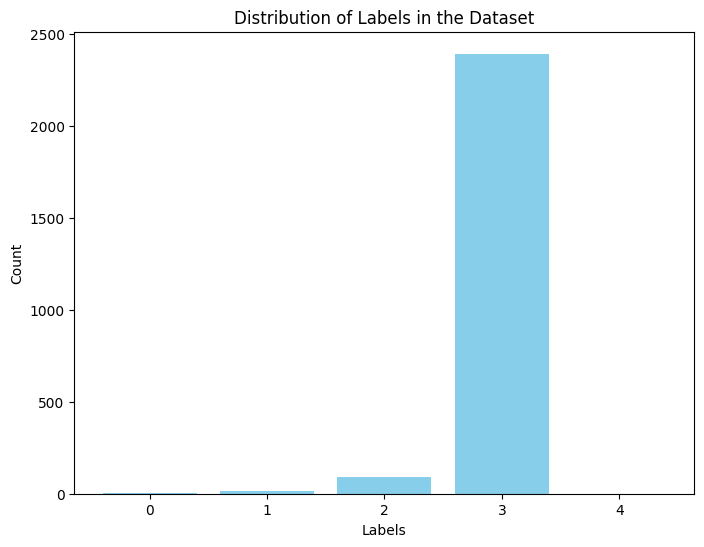

In [76]:
# Hiển thị phân phối của các nhãn trong tập dữ liệu
unique_labels, label_counts = np.unique(y, return_counts=True)
plt.figure(figsize=(8, 6))
plt.bar(unique_labels, label_counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in the Dataset')
plt.show()

In [77]:
# Chuyển đổi mảng hình ảnh thành dạng mà SVM có thể xử lý
X = X.reshape(X.shape[0], -1)  # Chuyển đổi mỗi ảnh thành một vector

In [78]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
# Hiển thị phân phối của các nhãn trong tập huấn luyện và tập kiểm tra
unique_train_labels, train_label_counts = np.unique(y_train, return_counts=True)
unique_test_labels, test_label_counts = np.unique(y_test, return_counts=True)


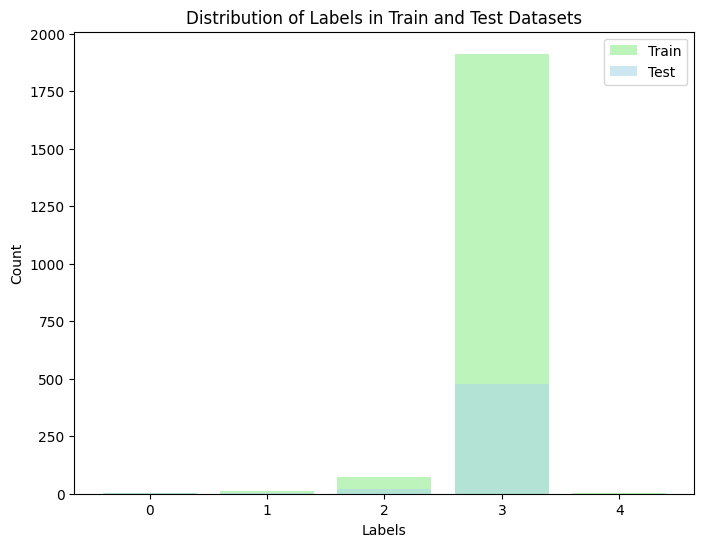

In [80]:
plt.figure(figsize=(8, 6))
plt.bar(unique_train_labels, train_label_counts, color='lightgreen', alpha=0.6, label='Train')
plt.bar(unique_test_labels, test_label_counts, color='lightblue', alpha=0.6, label='Test')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in Train and Test Datasets')
plt.legend()
plt.show()

In [81]:
# Đào tạo mô hình SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [82]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [83]:
# Đánh giá mô hình : accuracy = sl dự đoán đúng / tổng số mẫu
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.80%


In [84]:
# Lưu mô hình đã đào tạo
joblib.dump(model, 'svm_hand_pre_model_team.pkl')

['svm_hand_pre_model_team.pkl']

In [85]:
# Hiển thị số lượng dữ liệu ảnh và ID ảnh bị dự đoán sai trong mô hình
misclassified_images = []
for true_label, predicted_label, index in zip(y_test, y_pred, range(len(y_test))):
    image_id = data.iloc[index]['ID']
    if true_label != predicted_label:
        misclassified_images.append(image_id)

print("Số lượng dữ liệu ảnh bị dự đoán sai trong mô hình:", len(misclassified_images))
print("ID ảnh bị dự đoán sai trong mô hình:", misclassified_images)


Số lượng dữ liệu ảnh bị dự đoán sai trong mô hình: 16
ID ảnh bị dự đoán sai trong mô hình: [1393, 1396, 1468, 1479, 1496, 1511, 1529, 1570, 1629, 1666, 1667, 1720, 1729, 1793, 1887, 1922]


In [86]:
# Hiển thị báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=np.arange(len(label_encoder.classes_)), target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           L       0.00      0.00      0.00         1
           P       0.75      0.60      0.67        20
           T       0.98      0.99      0.98       478
           p       0.00      0.00      0.00         0

   micro avg       0.97      0.97      0.97       500
   macro avg       0.35      0.32      0.33       500
weighted avg       0.97      0.97      0.97       500



c:\Users\Quang Huy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Quang Huy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Quang Huy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

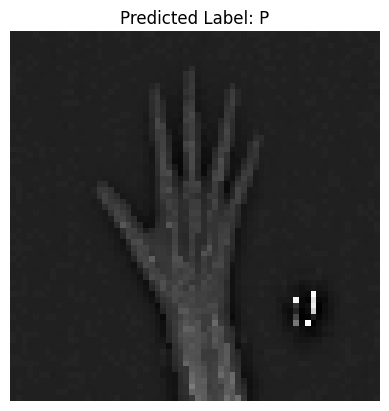

In [87]:
#đọc ảnh được đào tạo trong thư mục
import matplotlib.pyplot as plt

# Đọc ảnh bất kỳ từ thư mục train1
random_image_path = 'train1/2813.png'  # Đường dẫn đến ảnh bất kỳ trong thư mục train1
random_image = cv2.imread(random_image_path, cv2.IMREAD_GRAYSCALE)
random_image = cv2.resize(random_image, (64,64))  # Chuẩn hóa kích thước hình ảnh về 64x64

# Dự đoán loại của hình ảnh bằng mô hình đã đào tạo
predicted_label = model.predict(random_image.reshape(1, -1))
predicted_label = label_encoder.inverse_transform(predicted_label)[0]  # Chuyển đổi nhãn ngược lại thành chuỗi

# Hiển thị hình ảnh và nhãn tương ứng
plt.imshow(random_image, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


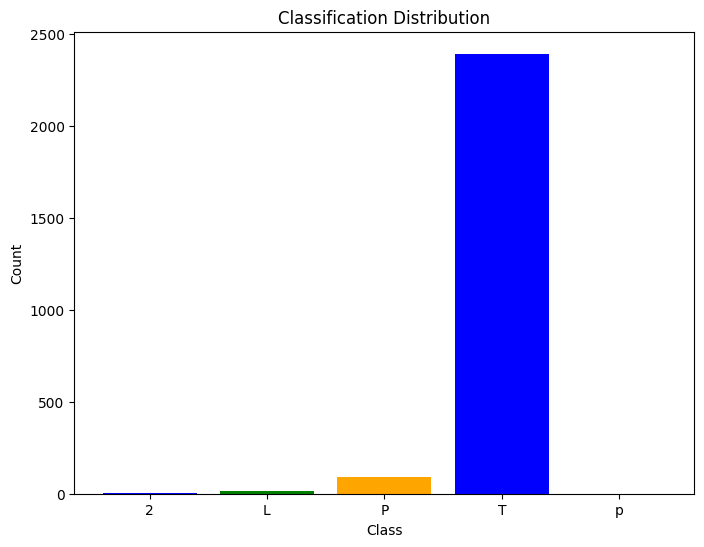

In [88]:
# Hiển thị biểu đồ phân loại
plt.figure(figsize=(8, 6))
labels = label_encoder.classes_
count_labels = [np.sum(y == label_encoder.transform([label])[0]) for label in labels]
plt.bar(labels, count_labels, color=['blue', 'green', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Classification Distribution')
plt.show()


In [89]:
# Hàm để đếm số lượng tay trái, tay phải và cả hai tay
def count_hand_labels(labels):
    left_hand_count = np.count_nonzero(labels == 'T')
    right_hand_count = np.count_nonzero(labels == 'P')
    both_hands_count = np.count_nonzero(labels == '2')
    return left_hand_count, right_hand_count, both_hands_count

# Đọc dữ liệu
data = pd.read_csv('team/Label.csv')

# Đọc dữ liệu ảnh và nhãn
images = []
labels = []

for index, row in data.iterrows():
    if row['Folder'] == 'train1':
        image_path = f"{output_folder}/{row['ID']}.png"
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image = cv2.resize(image, (64, 64))
            images.append(image)
            labels.append(row['Tay T (trai)/P (phai)/2 (ca 2 tay)'])

# Chuyển đổi danh sách hình ảnh và nhãn thành mảng numpy
X = np.array(images)
y = np.array(labels)

# Chuyển đổi nhãn thành số nguyên
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tính số lượng tay trái, tay phải và cả hai tay trước khi dự đoán
left_count_before, right_count_before, both_count_before = count_hand_labels(label_encoder.inverse_transform(y))

# Dự đoán
y_pred = model.predict(X.reshape(X.shape[0], -1))

# Tính số lượng tay trái, tay phải và cả hai tay sau khi dự đoán
left_count_after, right_count_after, both_count_after = count_hand_labels(label_encoder.inverse_transform(y_pred))

# Hiển thị số lượng tay trái, tay phải và cả hai tay trước và sau khi dự đoán
print("Số lượng tay trái (T) trước khi dự đoán:", left_count_before)
print("Số lượng tay phải (P) trước khi dự đoán:", right_count_before)
print("Số lượng cả hai tay (2) trước khi dự đoán:", both_count_before)
print("Số lượng tay trái (T) sau khi dự đoán:", left_count_after)
print("Số lượng tay phải (P) sau khi dự đoán:", right_count_after)
print("Số lượng cả hai tay (2) sau khi dự đoán:", both_count_after)


Số lượng tay trái (T) trước khi dự đoán: 2391
Số lượng tay phải (P) trước khi dự đoán: 93
Số lượng cả hai tay (2) trước khi dự đoán: 2
Số lượng tay trái (T) sau khi dự đoán: 2395
Số lượng tay phải (P) sau khi dự đoán: 89
Số lượng cả hai tay (2) sau khi dự đoán: 1


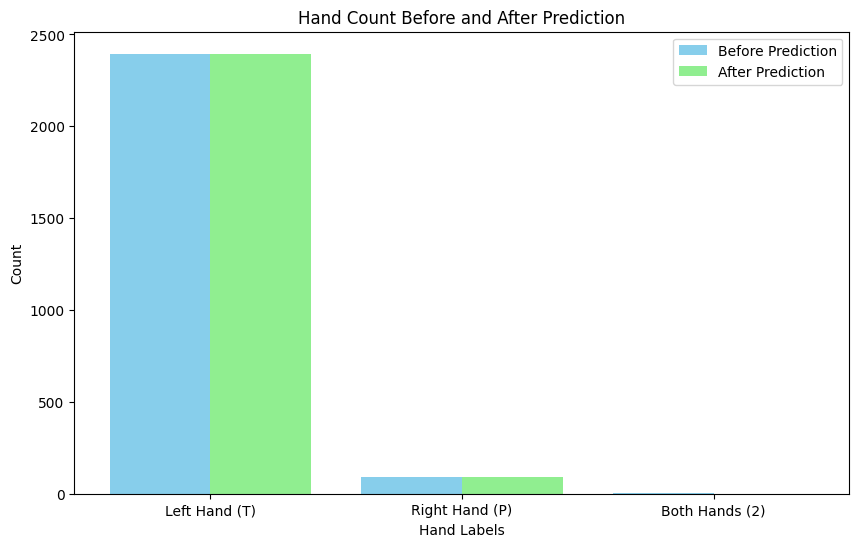

In [90]:
import matplotlib.pyplot as plt

# Số lượng tay trái, tay phải và cả hai tay trước và sau khi dự đoán
labels = ['Left Hand (T)', 'Right Hand (P)', 'Both Hands (2)']
before_prediction = [left_count_before, right_count_before, both_count_before]
after_prediction = [left_count_after, right_count_after, both_count_after]

x = range(len(labels))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(x, before_prediction, width=0.4, label='Before Prediction', color='skyblue')
plt.bar([i + 0.4 for i in x], after_prediction, width=0.4, label='After Prediction', color='lightgreen')
plt.xlabel('Hand Labels')
plt.ylabel('Count')
plt.title('Hand Count Before and After Prediction')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()
plt.show()


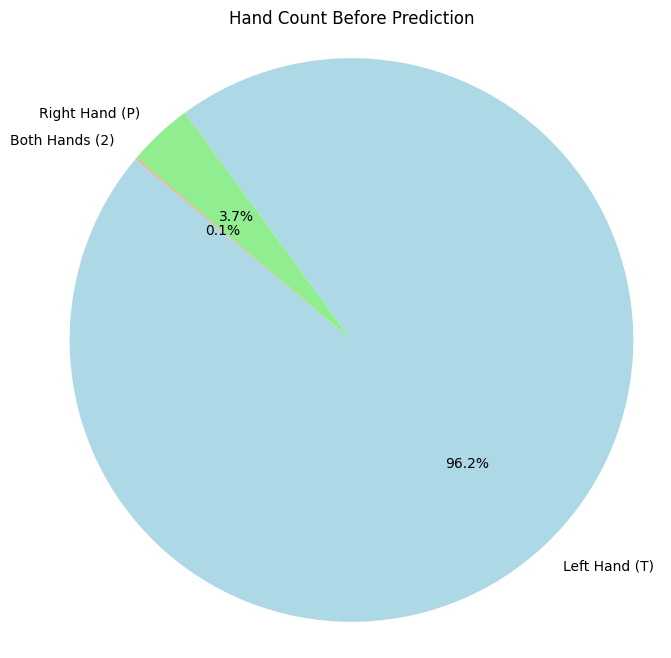

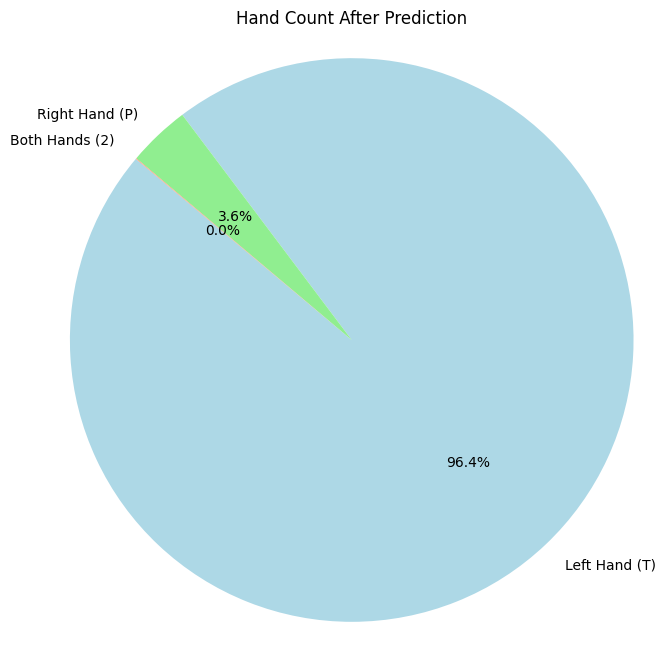

In [91]:
import matplotlib.pyplot as plt

# Số lượng tay trái, tay phải và cả hai tay trước và sau khi dự đoán
labels = ['Left Hand (T)', 'Right Hand (P)', 'Both Hands (2)']
before_prediction = [left_count_before, right_count_before, both_count_before]
after_prediction = [left_count_after, right_count_after, both_count_after]

# Vẽ biểu đồ dạng tròn
plt.figure(figsize=(8, 8))
plt.pie(before_prediction, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightsalmon'])
plt.title('Hand Count Before Prediction')
plt.axis('equal')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(after_prediction, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightsalmon'])
plt.title('Hand Count After Prediction')
plt.axis('equal')
plt.show()


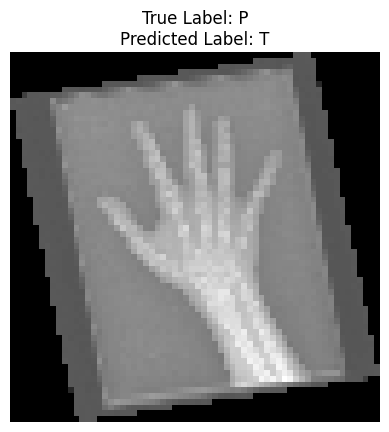

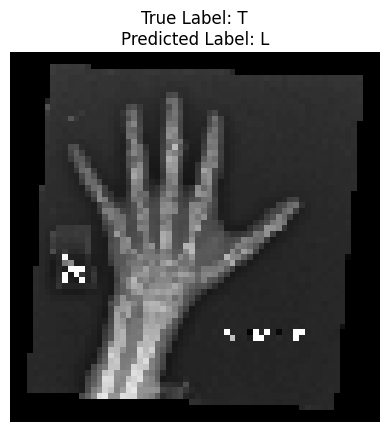

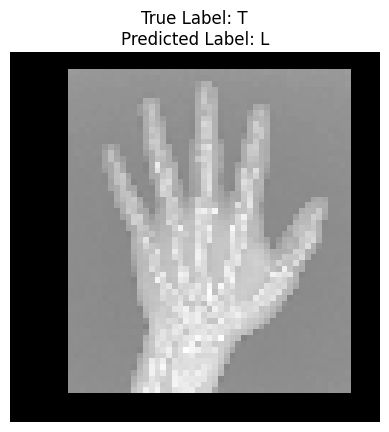

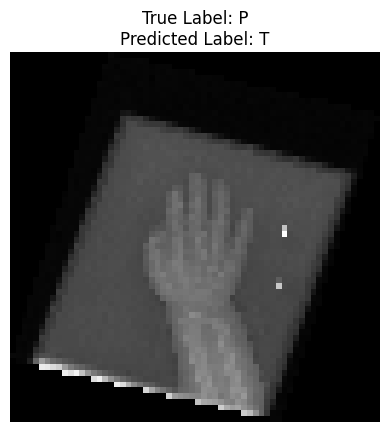

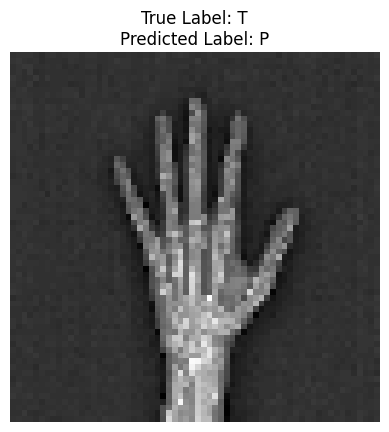

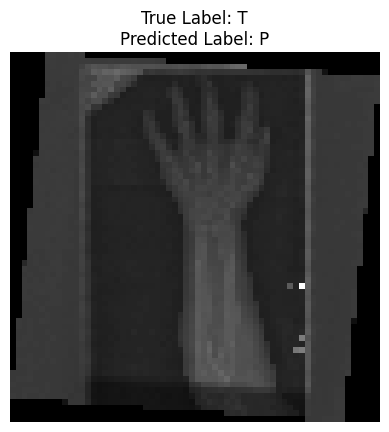

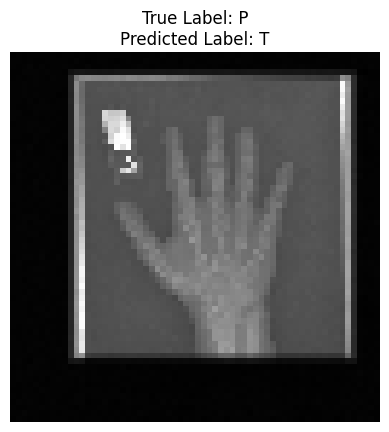

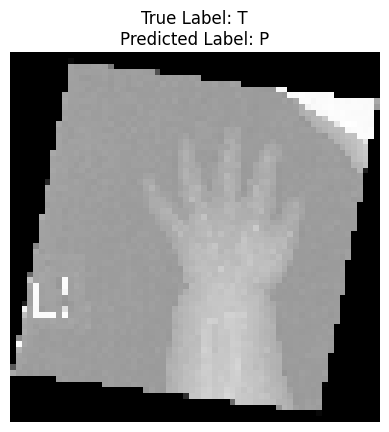

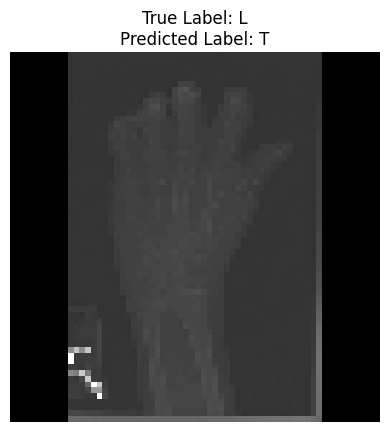

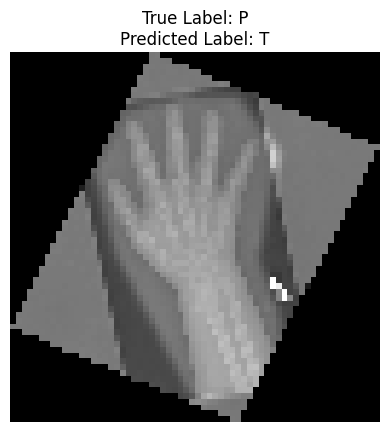

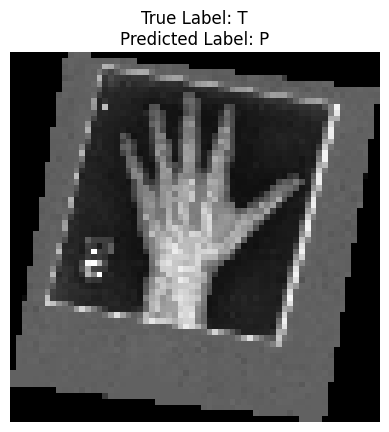

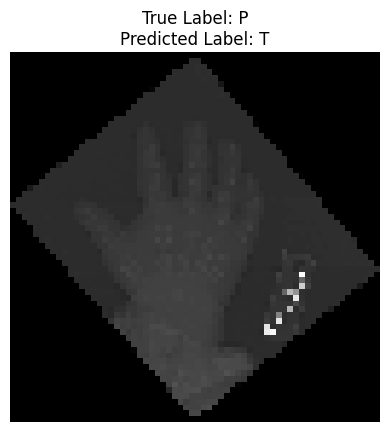

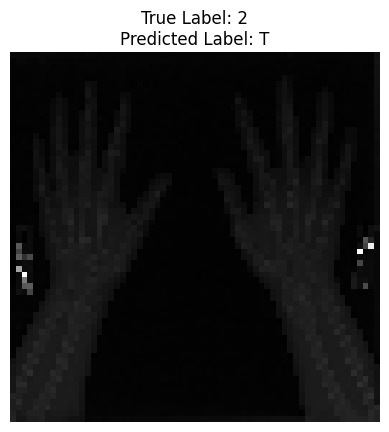

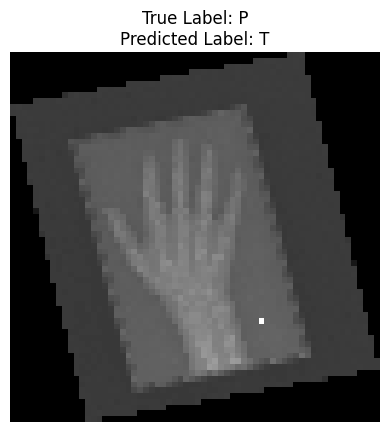

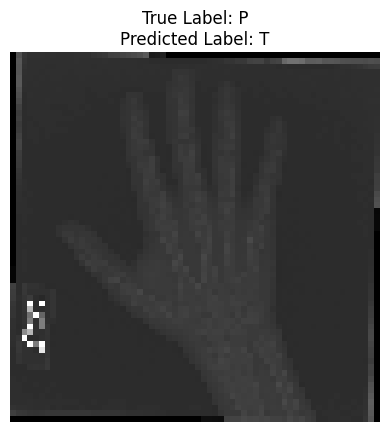

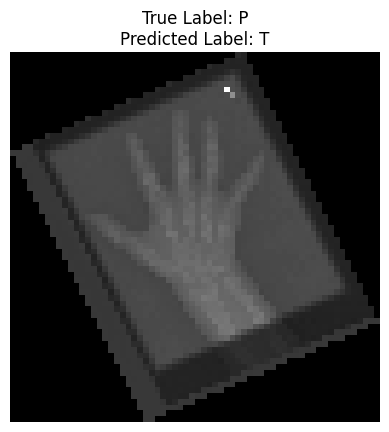

In [92]:
def show_misclassified_images(images, true_labels, predicted_labels, label_encoder):
    misclassified_indices = (true_labels != predicted_labels)
    misclassified_images = images[misclassified_indices]
    true_labels_misclassified = true_labels[misclassified_indices]
    predicted_labels_misclassified = predicted_labels[misclassified_indices]
    
    for i in range(len(misclassified_images)):
        image = misclassified_images[i].reshape(64, 64)  # Chuyển đổi lại kích thước ảnh
        true_label = label_encoder.inverse_transform([true_labels_misclassified[i]])[0]
        predicted_label = label_encoder.inverse_transform([predicted_labels_misclassified[i]])[0]
        
        plt.imshow(image, cmap='gray')
        plt.title(f'True Label: {true_label}\nPredicted Label: {predicted_label}')
        plt.axis('off')
        plt.show()

# Sử dụng hàm
show_misclassified_images(X_test, y_test, model.predict(X_test.reshape(X_test.shape[0], -1)), label_encoder)
